In [1]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt


### 读取数据

In [7]:
# 读取csv格式
# h_data=pd.read_csv('/Users/rickie/Desktop/mysql_learning/melb_data.csv') 
h_data=pd.read_csv('/Users/rickie/Desktop/czbank_test/melb_data.csv') 

In [ ]:
# 读取json格式数据,结果为dict格式，可以生成DaraFrame
import json
path=''
data=[json.loads(line) for line in open(path)]
df=pd.DataFrame(data)

### 查看数据

In [4]:
h_data.isnull().sum()
h_data.describe()
h_data.info()
# df.isnull().sum()
# df.isnull().any()
h_data.dtypes # 查看数据格式

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
h_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### 清洗数据

In [6]:
# 处理缺失数据

h_data['BuildingArea'].fillna(h_data['BuildingArea'].mean(),inplace=True) # 填充缺失值

max_v=h_data['YearBuilt'].value_counts().index[0] # 用最多数值填充缺失值
h_data['YearBuilt'].fillna(max_v,inplace=True)

h_data.dropna(subset=['Car'],inplace=True) # 删除Car为空的所有列


h_data.CouncilArea.fillna('Unknown',inplace=True)

h_data.drop_duplicates() # 检查是否有重复数据

h_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13518 non-null object
Address          13518 non-null object
Rooms            13518 non-null int64
Type             13518 non-null object
Price            13518 non-null float64
Method           13518 non-null object
SellerG          13518 non-null object
Date             13518 non-null object
Distance         13518 non-null float64
Postcode         13518 non-null float64
Bedroom2         13518 non-null float64
Bathroom         13518 non-null float64
Car              13518 non-null float64
Landsize         13518 non-null float64
BuildingArea     13518 non-null float64
YearBuilt        13518 non-null float64
CouncilArea      13518 non-null object
Lattitude        13518 non-null float64
Longtitude       13518 non-null float64
Regionname       13518 non-null object
Propertycount    13518 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.3+ M

In [9]:
# h_data.Distance.value_counts()
dis=h_data.groupby('Distance').size() # 分组
dis[dis>200].sort_values(ascending=False) # 排序
# h_data.Distance.value_counts()

Distance
11.2    739
9.2     367
13.9    324
7.8     306
4.6     260
13.0    252
8.0     248
5.2     247
13.8    237
2.6     235
8.8     223
10.5    222
11.4    218
3.3     214
8.4     205
7.5     201
6.4     201
dtype: int64

### 数据筛选及排序

In [21]:
price_index=h_data['Price'].map(lambda x:x>h_data['Price'].mean())
h_data[price_index]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00000,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00000,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.00000,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0
11,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.00000,2005.0,Yarra,-37.80850,144.99640,Northern Metropolitan,4019.0
13,Abbotsford,45 William St,2,h,1172500.0,S,Biggin,13/08/2016,2.5,3067.0,...,1.0,1.0,195.0,151.96765,1970.0,Yarra,-37.80840,144.99730,Northern Metropolitan,4019.0
15,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,...,1.0,2.0,238.0,97.00000,1890.0,Yarra,-37.80900,144.99760,Northern Metropolitan,4019.0
16,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,...,2.0,1.0,113.0,110.00000,1880.0,Yarra,-37.80560,144.99300,Northern Metropolitan,4019.0


In [26]:
h_data.sort_values(by='Price',ascending=False).head(10)#排序并筛选价格前十位的数据

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,...,1.0,1.0,744.0,117.00000,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0
7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,...,5.0,4.0,2079.0,464.30000,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0
9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,17/06/2017,5.3,3122.0,...,2.0,4.0,1690.0,284.00000,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0
3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,3101.0,...,6.0,3.0,1334.0,365.00000,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0
12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,9/09/2017,3.0,3206.0,...,2.0,1.0,553.0,308.00000,1920.0,Unknown,-37.84908,144.95753,Southern Metropolitan,2019.0
6372,Toorak,17 Albany Rd,3,h,6250000.0,S,Kay,15/10/2016,4.6,3142.0,...,3.0,2.0,564.0,342.00000,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0
7554,Brighton,161 Church St,5,h,5800000.0,PI,Castran,8/04/2017,11.2,3186.0,...,4.0,4.0,1276.0,151.96765,1880.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0
5631,South Yarra,18 Avoca St,4,h,5700000.0,S,Castran,12/11/2016,3.3,3141.0,...,2.0,0.0,292.0,272.00000,1880.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0
9233,Middle Park,204 Page St,6,h,5600000.0,PI,Marshall,3/06/2017,3.0,3206.0,...,4.0,2.0,472.0,328.00000,1915.0,Port Phillip,-37.85231,144.96373,Southern Metropolitan,2019.0
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,17/09/2016,6.3,3143.0,...,3.0,4.0,1491.0,516.00000,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0


### 数据透视表

In [41]:
t=h_data.pivot_table('Price',index='Method',columns='Rooms',aggfunc='mean')
type(t)

pandas.core.frame.DataFrame

In [93]:
a=h_data.groupby(['Rooms','Method']).Price.count().unstack()
a.index
a.sort_values(by='S',axis=0)#纵向排序，默认axis=0


Method,PI,S,SA,SP,VB
Rooms,,,,,
8,3.0,3.0,NaN,NaN,2.0
7,3.0,5.0,NaN,2.0,NaN
6,12.0,34.0,NaN,7.0,14.0
5,121.0,325.0,5.0,61.0,84.0
1,97.0,328.0,4.0,141.0,108.0
4,376.0,1757.0,19.0,289.0,243.0
2,373.0,2397.0,20.0,499.0,333.0
3,571.0,4139.0,43.0,696.0,403.0
10,1.0,NaN,NaN,NaN,NaN


In [90]:
a.sort_values(by=8,axis=1)#横向排序

Method,VB,PI,S,SA,SP
Rooms,,,,,
1,108.0,97.0,328.0,4.0,141.0
2,333.0,373.0,2397.0,20.0,499.0
3,403.0,571.0,4139.0,43.0,696.0
4,243.0,376.0,1757.0,19.0,289.0
5,84.0,121.0,325.0,5.0,61.0
6,14.0,12.0,34.0,NaN,7.0
7,NaN,3.0,5.0,NaN,2.0
8,2.0,3.0,3.0,NaN,NaN
10,NaN,1.0,NaN,NaN,NaN


In [92]:
a.sort_index(axis=1)#按照列标签排序

Method,PI,S,SA,SP,VB
Rooms,,,,,
1,97.0,328.0,4.0,141.0,108.0
2,373.0,2397.0,20.0,499.0,333.0
3,571.0,4139.0,43.0,696.0,403.0
4,376.0,1757.0,19.0,289.0,243.0
5,121.0,325.0,5.0,61.0,84.0
6,12.0,34.0,NaN,7.0,14.0
7,3.0,5.0,NaN,2.0,NaN
8,3.0,3.0,NaN,NaN,2.0
10,1.0,NaN,NaN,NaN,NaN


In [130]:
b=pd.pivot_table(h_data[['Method','Rooms','Price']],index=['Method','Rooms'],aggfunc='count')
b.groupby(level=0).Price.sum()# 根据level=0(Method)分组求和
b['Pct']=round(b.Price/b.groupby(level=0).Price.sum(),4)
b.loc['total',:]=b.sum().values
#b

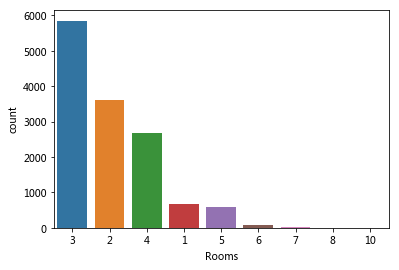

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
h_data.Rooms.value_counts().values
sns.countplot(x=h_data.Rooms,order=h_data.Rooms.value_counts().index)# order行标签排序
# sns.barplot(h_data.Rooms.value_counts().index,h_data.Rooms.value_counts().values) #与上图相同

([<matplotlib.patches.Wedge at 0x1a1fc93208>,
 [Text(-0.5446780393671519, 0.9556808219437887, 'S'),
  Text(-0.15440679094765974, -1.0891090592356882, 'SP'),
  Text(0.6345934229257765, -0.8984938439295769, 'PI'),
  Text(1.0447950305197207, -0.34409787009119425, 'VB'),
  Text(1.0997540155745151, -0.02326166863596667, 'SA')])

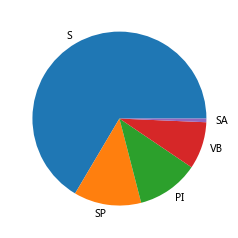

In [147]:
plt.pie(h_data.Method.value_counts().values,labels=h_data.Method.value_counts().index)

In [8]:
from pyecharts.charts import Bar
from pyecharts import options as opts
bar = Bar(init_opts=opts.InitOpts(width="800px", height="400px"))
bar.add_xaxis(list(h_data.Method.value_counts().index))
bar.add_yaxis("A", [8988, 1695, 1557, 1187,91])
bar.set_global_opts(title_opts=opts.TitleOpts(title="building method"))
bar.render_notebook()

count    1.351800e+04
mean     1.074796e+06
std      6.398586e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.010000e+05
75%      1.328000e+06
max      9.000000e+06
Name: Price, dtype: float64

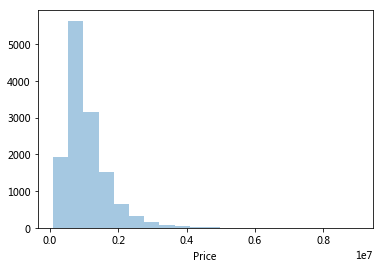

In [248]:
sns.distplot(h_data.Price,bins=20,kde=False)
h_data.Price.describe()

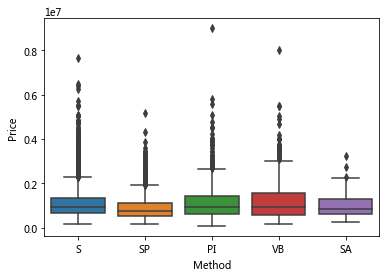

In [249]:
sns.boxplot(x=h_data.Method,y=h_data.Price)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13518 non-null object
Address          13518 non-null object
Rooms            13518 non-null int64
Type             13518 non-null object
Price            13518 non-null float64
Method           13518 non-null object
SellerG          13518 non-null object
Date             13518 non-null object
Distance         13518 non-null float64
Postcode         13518 non-null float64
Bedroom2         13518 non-null float64
Bathroom         13518 non-null float64
Car              13518 non-null float64
Landsize         13518 non-null float64
BuildingArea     13518 non-null float64
YearBuilt        13518 non-null float64
CouncilArea      13518 non-null object
Lattitude        13518 non-null float64
Longtitude       13518 non-null float64
Regionname       13518 non-null object
Propertycount    13518 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.9+ M

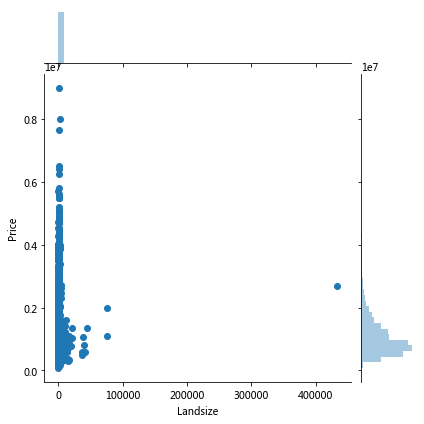

In [266]:
h_data.info()
sns.jointplot(x=h_data.Landsize,y=h_data.Price)

### 转换数据格式

In [10]:
h_data['YearBuilt']=h_data['YearBuilt'].astype(int)


### 合并df

In [54]:
df1 = DataFrame({'name':['ZhangFei', 'GuanYu', 'a', 'b', 'c'], 'data1':range(5),'data3':['dddd','e','a','f','z']})
df2 = DataFrame({'name':['ZhangFei', 'GuanYu', 'A', 'B', 'C'], 'data1':range(5)})

In [61]:
pd.merge(df1,df2,how='inner')

,name,data1,data3
0,ZhangFei,0,dddd
1,GuanYu,1,e


### apply函数的使用

In [16]:
def plus(df,n,m):
    df['new1'] = (df[u'Chinese']+df[u'English']) * m
    df['new2'] = (df[u'Chinese']+df[u'English']) * n
    return df
df.apply(plus,axis=1,args=(2,3))# args=不可省略


,English,Math,Chinese,new1,new2
ZhangFei,65,30,66,393,262
GuanYu,85,98,95,540,360
ZhaoYun,92,96,93,555,370
HuangZhong,88,77,90,534,356
DianWei,90,90,80,510,340
